In [23]:
import numpy as np
from tensorflow.keras.datasets import cifar10, cifar100
import matplotlib.pyplot as plt
from itertools import chain
from collections import Counter

In [38]:
def load_cifar_datasets():
    (cifar10_train_images, cifar10_train_labels), (cifar10_test_images, cifar10_test_labels) = cifar10.load_data()
    (cifar100_train_images, cifar100_train_labels), (cifar100_test_images, cifar100_test_labels) = cifar100.load_data()
    return cifar10_train_images, cifar10_train_labels, cifar100_train_images, cifar100_train_labels, cifar10_test_images, cifar10_test_labels, cifar100_test_images, cifar100_test_labels

def filter_and_combine_datasets(cifar10_train_images, cifar10_train_labels, cifar100_train_images, cifar100_train_labels):
    cifar10_classes = {'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'horse': 7, 'truck': 9}
    cifar100_classes = {'cattle': 11, 'fox': 34, 'baby': 20, 'boy': 21, 'girl': 35, 'man': 44, 'woman': 98,
                        'rabbit': 65, 'squirrel': 78, 'trees': 84, 'bicycle': 8, 'bus': 13,
                        'motorcycle': 48, 'pickup truck': 58, 'train': 95, 'lawn-mower': 48, 'tractor': 86}

    def filter_dataset(images, labels, class_mapping):
        filtered_images = []
        filtered_labels = []
        for img, lbl in zip(images, labels):
            class_id = lbl[0]
            if class_id in class_mapping.values():
                class_name = list(class_mapping.keys())[list(class_mapping.values()).index(class_id)]
                filtered_images.append(img)
                filtered_labels.append(class_name)
        return filtered_images, filtered_labels

    cifar10_filtered_images, cifar10_filtered_labels = filter_dataset(cifar10_train_images, cifar10_train_labels, cifar10_classes)
    cifar100_filtered_images, cifar100_filtered_labels = filter_dataset(cifar100_train_images, cifar100_train_labels, cifar100_classes)

    combined_images = cifar10_filtered_images + cifar100_filtered_images
    combined_labels = cifar10_filtered_labels + cifar100_filtered_labels

    return combined_images, combined_labels



In [39]:

def display_histogram(train_labels, test_labels, title="Dataset Label Distribution"):
    # Create a figure with two subplots (one above the other).
    plt.figure(figsize=(14, 8))

    # Plotting histogram for train labels in the first subplot.
    plt.subplot(2, 1, 1)
    plt.hist(train_labels, bins=len(set(train_labels)), color='blue', alpha=0.7)
    plt.title('Train Labels', fontsize=16)   # Set the title for the train labels histogram.
    plt.xlabel('Label', fontsize=14)         # Set the x-axis label.
    plt.ylabel('Frequency', fontsize=14)     # Set the y-axis label.
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)

    # Plotting histogram for test labels in the second subplot.
    plt.subplot(2, 1, 2)
    plt.hist(test_labels, bins=len(set(test_labels)), color='green', alpha=0.7)
    plt.title('Test Labels', fontsize=16)    # Set the title for the test labels histogram.
    plt.xlabel('Label', fontsize=14)         # Set the x-axis label.
    plt.ylabel('Frequency', fontsize=14)     # Set the y-axis label.
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)

    # Set the main title for the entire figure.
    plt.suptitle(title, fontsize=18)

    # Adjust the layout to prevent subplot overlap and display the figure.
    plt.tight_layout()
    plt.show()

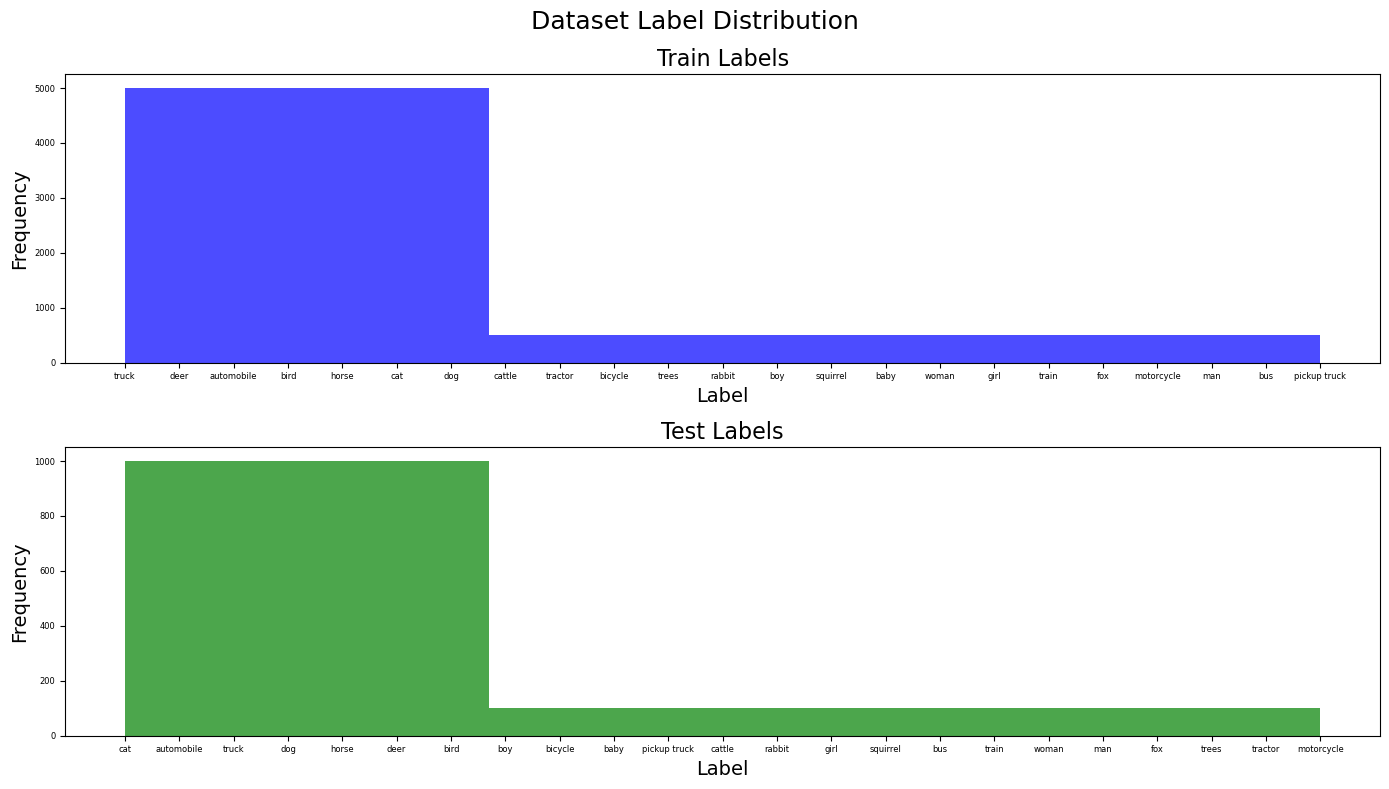

In [40]:
# Load CIFAR datasets (training and testing data for CIFAR-10 and CIFAR-100)
cifar10_train_images, cifar10_train_labels, cifar100_train_images, cifar100_train_labels, cifar10_test_images, cifar10_test_labels, cifar100_test_images, cifar100_test_labels = load_cifar_datasets()

# Filter and combine training and testing data from CIFAR-10 and CIFAR-100
combined_train_images, combined_train_labels = filter_and_combine_datasets(cifar10_train_images, cifar10_train_labels, cifar100_train_images, cifar100_train_labels)
combined_test_images, combined_test_labels = filter_and_combine_datasets(cifar10_test_images, cifar10_test_labels, cifar100_test_images, cifar100_test_labels)

# Display histograms of label distributions for the combined datasets
display_histogram(combined_train_labels, combined_test_labels)

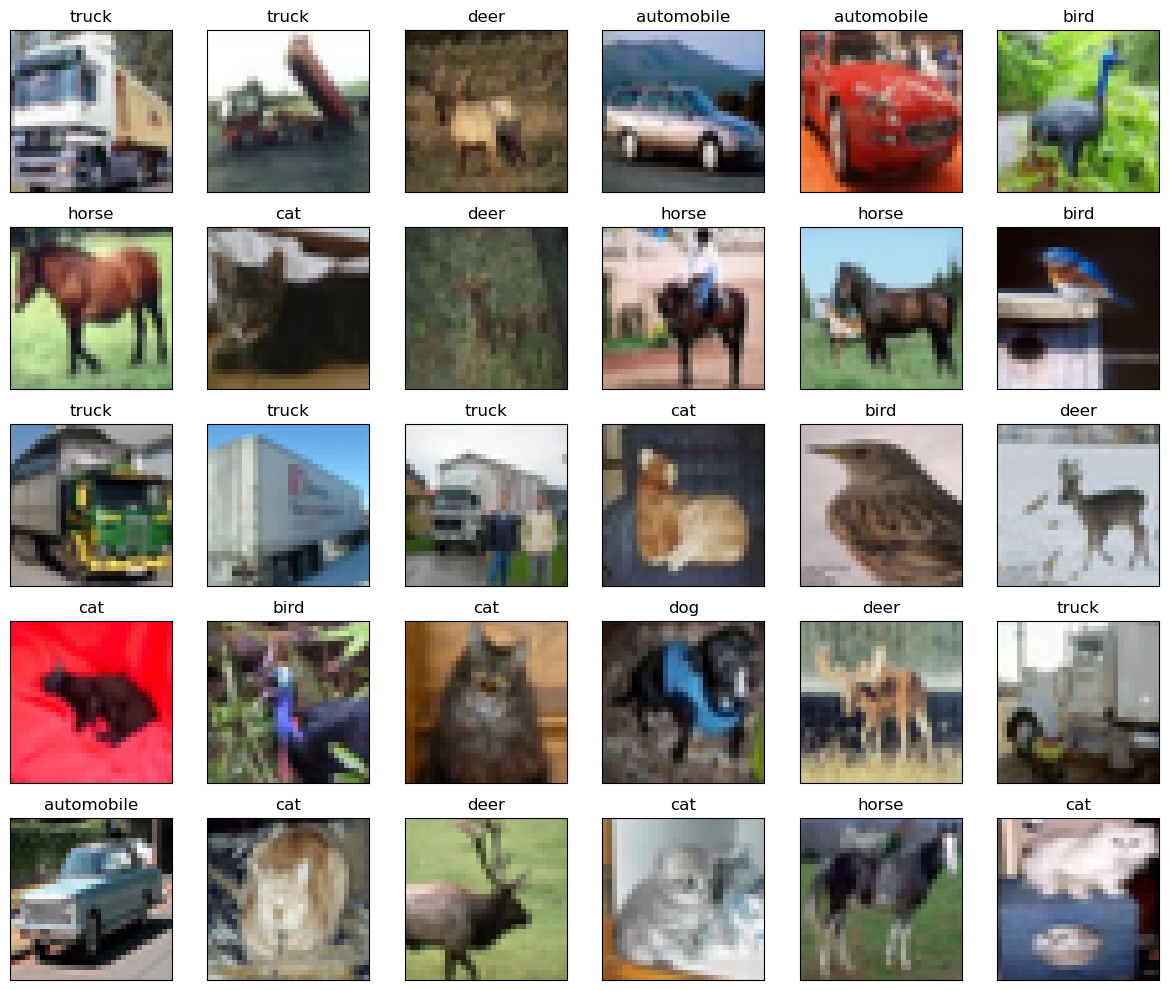

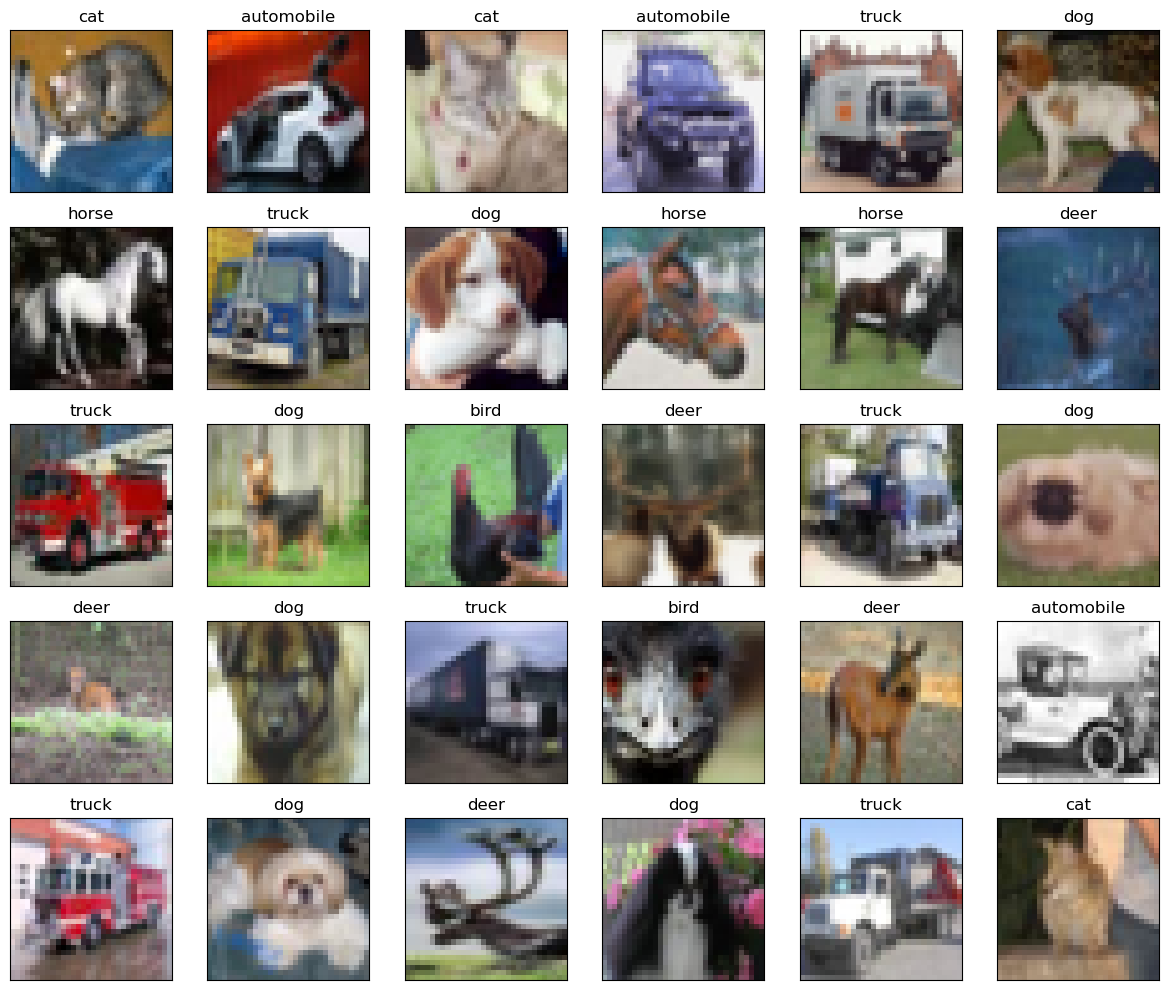

In [42]:
def show_images(images, labels, num_images=30):
    fig, axes = plt.subplots(5, 6, figsize=(12, 10))

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(labels[i])
    
    plt.tight_layout()
    plt.show()

# Show 30 images from combined training set
show_images(combined_train_images[:100], combined_train_labels[:100])

# Show 30 images from combined test set
show_images(combined_test_images[:30], combined_test_labels[:30])